The cool lab 5 😎

SPARSE DATA IS BUGGED IN KERAS. EMBEDDING IS FINE THO

More town hall stuff: Using our best wide and deep network. For one change we can make we can do # of layers, crossed features, etc... Now we compare this to a standard MLP. Use the Keras MLP and compare using a mcnemar test or a macro averaged roc between 

In [14]:
#load in the dataset
import pandas as pd
import numpy as np
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [15]:
#the goal here is the simple binary classification, is it going to rain or not tomorrow?
#lets see how many rows there are
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df.groupby(['RainTomorrow']).count()
#looks like we have about 110316 for no rain and 31877 for rain. This is great! I do not think we need to fold with this much per class

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
No,110316,110316,109854,110049,109586,63491,57556,103453,103488,102224,...,109076,107670,99405,99448,67914,64811,109710,108332,109586,110316
Yes,31877,31877,31702,31822,31201,17859,16821,29410,29435,29956,...,31343,30913,28774,28764,20622,20288,31579,31135,31201,31877


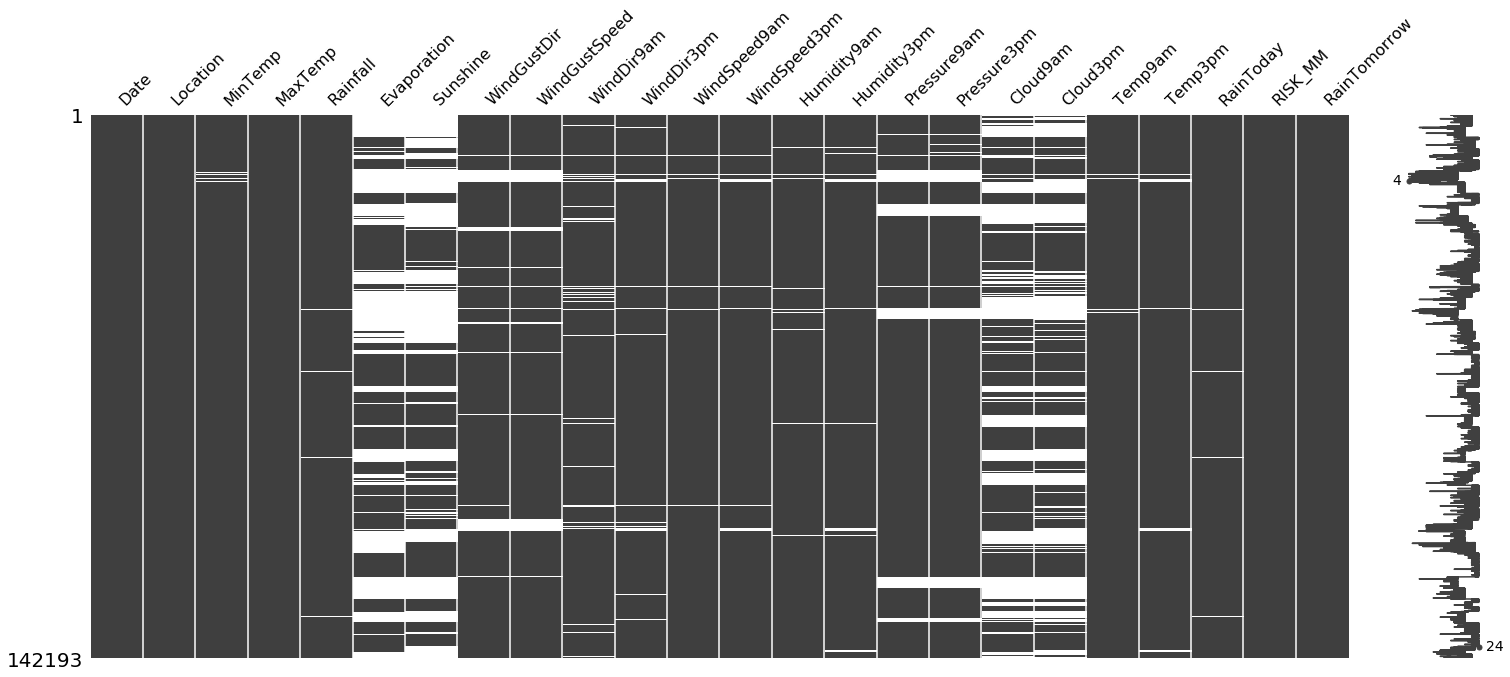

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df)

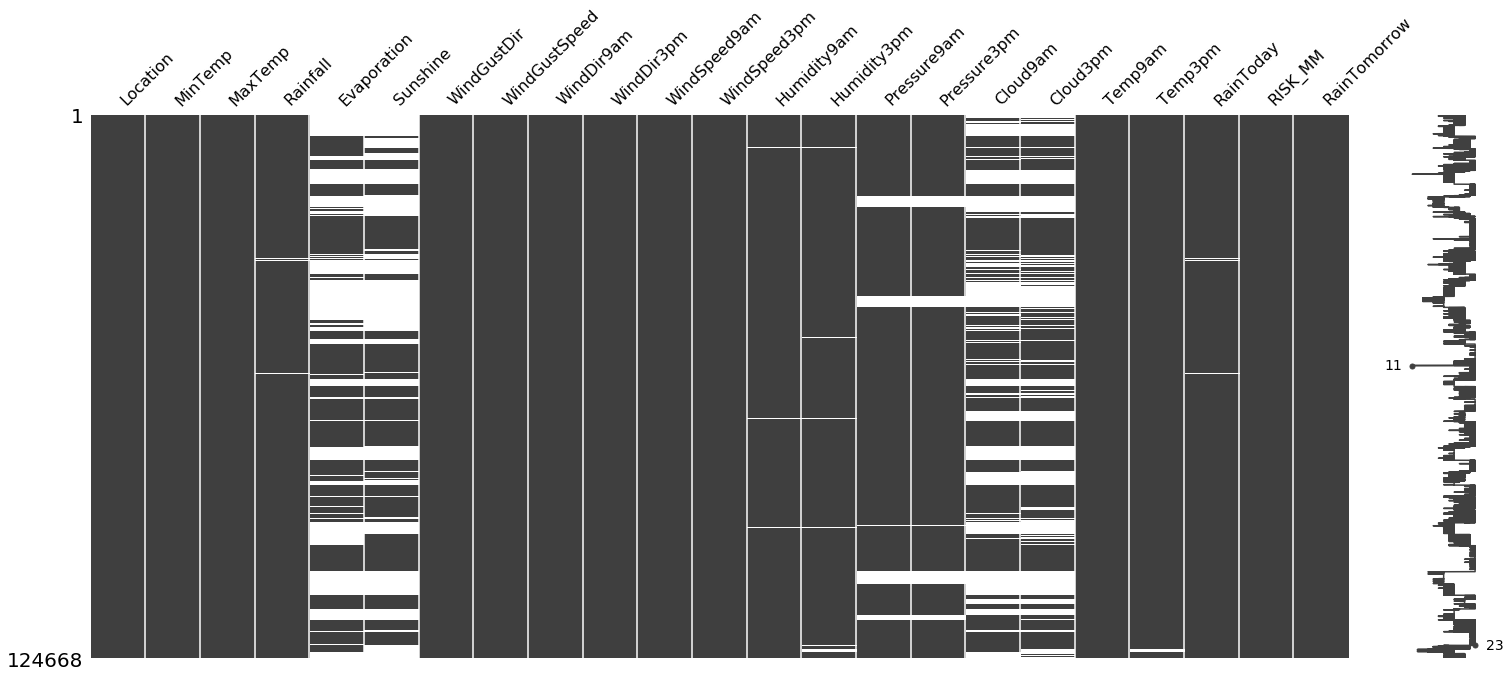

In [17]:
#NOOO We have to make sure we have no NaNs. This is gonna be a pain in the ass
#this many imputations is gonna need a whole package to make this easy for me
#df = df.drop(columns=['Date'])
#WE NEED TO REMOVE ALL ROWS MISSING ANY CATEGORICAL DATA bc its dumb to impute
df= df.dropna(subset=categorical_cols + ["RainTomorrow"])
df = df.drop(columns=["Date"])
mn.matrix(df)

oooo. this is wacky looking. this link is an interesting read on what to do with the 4 variables that have a ton of null values    https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca   
for now... well just ignore it :(


In [18]:
#lets split into train and test, were gonna do a standard 80/20 split for now
#first lets grab y as the 
di = {"No": 0, "Yes": 1}
df = df.replace({"RainTomorrow": di})
df = df.replace({"RainToday": di})

In [19]:
y

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 124668, dtype: int64

In [20]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [21]:
#one hot encode here
df_copy = df
for col in categorical_cols:
    one_hot = pd.get_dummies(df[col],prefix=col, drop_first=True)
    df = df.join(one_hot)
df = df.drop(columns=categorical_cols)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_numeric = df.select_dtypes(include=[np.float, np.int])
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_numeric.values)  
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=np.nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=.001,
                 verbose=0)
df_nums = ((imp.transform(df_numeric.values)))


//anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [23]:
counter = 0
print(df.shape)
for col in df_numeric:
    df[col] = df_nums[:,counter]
    counter +=1
df

(124668, 110)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,6.528619,7.038301,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,6.203086,10.916969,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,8.711721,11.681981,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,6.822924,11.221013,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,7.469472,5.906526,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.855972,9.728961,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,0,0
142189,2.8,23.4,0.0,5.294608,10.311247,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
142190,3.6,25.3,0.0,5.375745,10.877192,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
142191,5.4,26.9,0.0,6.208170,10.494394,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
for col in ["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]:
    df_copy[col] = df[col]
df_copy.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,6.528619,7.038301,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.000000,5.115568,16.9,21.8,0.0,0.0,0
1,Albury,7.4,25.1,0.0,6.203086,10.916969,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,1.975227,2.648754,17.2,24.3,0.0,0.0,0
2,Albury,12.9,25.7,0.0,8.711721,11.681981,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,2.059940,2.000000,21.0,23.2,0.0,0.0,0
3,Albury,9.2,28.0,0.0,6.822924,11.221013,NE,24.0,SE,E,...,16.0,1017.6,1012.8,1.369620,2.182176,18.1,26.5,0.0,1.0,0
4,Albury,17.5,32.3,1.0,7.469472,5.906526,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0


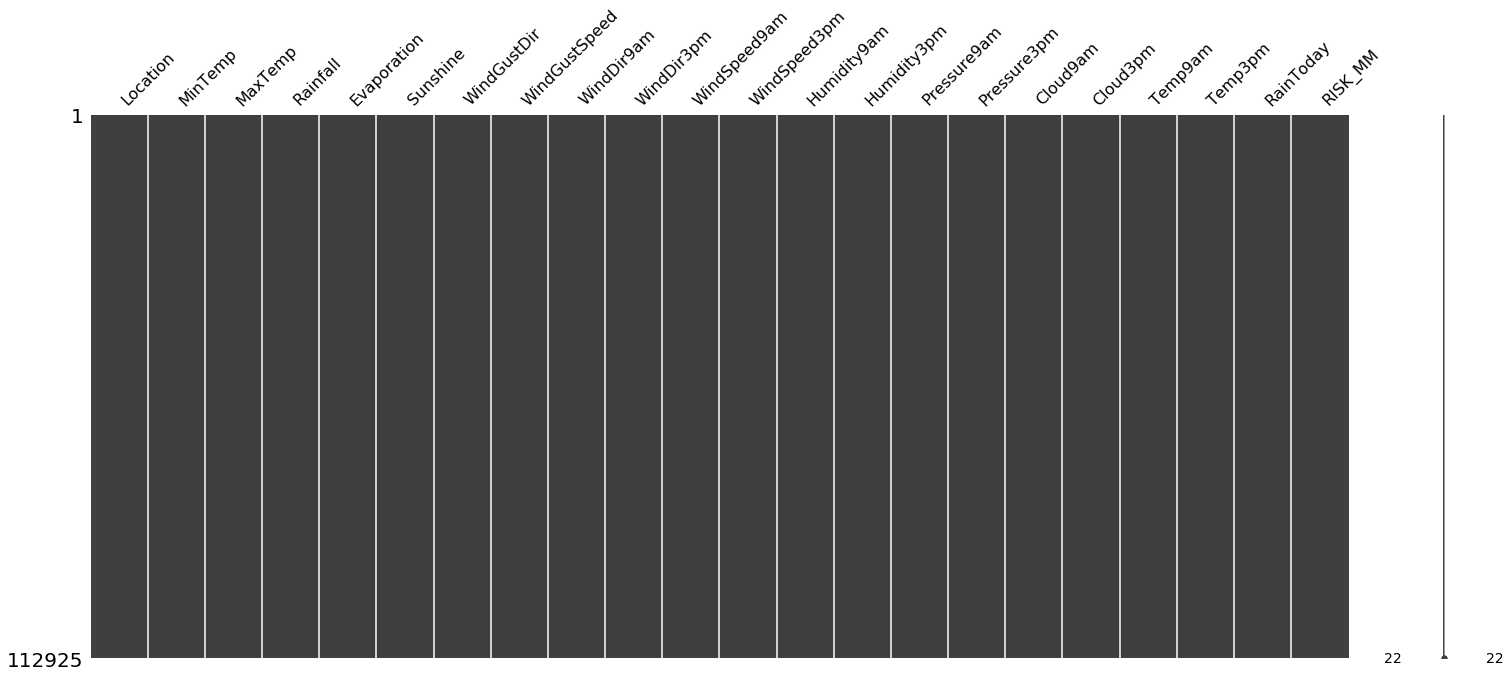

In [26]:
df_copy = df_copy.dropna(how='any')
y = df_copy['RainTomorrow']
df_copy = df_copy.drop(columns=['RainTomorrow'])
mn.matrix(df_copy)


In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
df_copy.dropna(how="all")
#ohe_train, ohe_test, ohe_y_train, ohe_y_test = train_test_split(df, y, test_size = .2)
encoded_train, encoded_test, encoded_y_train, encoded_y_test = train_test_split(df_copy, y, test_size = .20)
print(len(encoded_train), len(encoded_test))
encoded_train

90340 22585


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
115581,PerthAirport,5.7,14.9,3.8,1.600000,7.300000,S,30.0,NNE,SSW,...,88.0,52.0,1019.1,1019.5,1.000000,3.000000,9.5,14.5,1.0,0.0
2213,Albury,12.7,24.2,3.0,3.828874,4.175562,ENE,39.0,ENE,SE,...,85.0,62.0,1022.1,1019.3,8.000000,6.000000,16.1,22.5,1.0,1.4
109950,Witchcliffe,12.1,16.6,5.6,4.243706,4.276704,SSW,54.0,SSW,S,...,81.0,61.0,1014.0,1016.6,6.878967,6.488525,13.5,15.0,1.0,1.8
77430,Watsonia,7.7,16.4,1.8,4.800000,12.000000,S,41.0,S,SW,...,64.0,52.0,1028.7,1029.4,4.000000,4.000000,11.8,14.4,1.0,0.0
90259,GoldCoast,19.9,26.6,8.0,4.324836,4.543983,W,57.0,N,NNE,...,81.0,81.0,1013.1,1008.6,6.409132,6.529089,24.5,24.7,1.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33888,SydneyAirport,18.6,22.7,0.0,6.800000,5.500000,SSW,37.0,SW,S,...,71.0,75.0,1018.6,1017.0,7.000000,6.000000,20.3,21.2,0.0,0.8
134547,AliceSprings,20.4,35.7,0.0,10.800000,9.500000,WSW,52.0,WSW,WNW,...,16.0,11.0,1012.6,1008.9,6.000000,5.000000,31.3,33.8,0.0,0.0
105149,Woomera,16.3,26.8,0.0,8.980867,9.100000,SSW,48.0,S,S,...,51.0,30.0,1020.3,1019.5,3.264128,0.000000,18.4,25.1,0.0,0.0
85706,Cairns,18.5,29.4,0.0,7.000000,11.800000,SE,33.0,S,SE,...,60.0,49.0,1013.7,1010.2,1.000000,1.000000,25.0,27.5,0.0,0.0


In [28]:
#validation cell
encoded_train.groupby(['Location']).count()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,...,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203
Albury,1949,1949,1949,1949,1949,1949,1949,1949,1949,1949,...,1949,1949,1949,1949,1949,1949,1949,1949,1949,1949
AliceSprings,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210,...,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210
BadgerysCreek,1868,1868,1868,1868,1868,1868,1868,1868,1868,1868,...,1868,1868,1868,1868,1868,1868,1868,1868,1868,1868
Ballarat,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296,...,2296,2296,2296,2296,2296,2296,2296,2296,2296,2296
Bendigo,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,...,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Brisbane,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,...,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407
Cairns,2369,2369,2369,2369,2369,2369,2369,2369,2369,2369,...,2369,2369,2369,2369,2369,2369,2369,2369,2369,2369
Canberra,2161,2161,2161,2161,2161,2161,2161,2161,2161,2161,...,2161,2161,2161,2161,2161,2161,2161,2161,2161,2161


In [94]:
from keras.layers import Dense, Activation, Input, Dot
from keras.layers import Embedding, Flatten, Concatenate
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#standard wide and deep with no cross columns

from sklearn.preprocessing import OneHotEncoder
from keras.layers import concatenate
# now let's encode the integer outputs as one hot encoded labels
ohe = OneHotEncoder()
numeric_cols = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", 
                "WindSpeed3pm", "Humidity3pm", "Pressure9am", "Humidity9am", "Pressure3pm", 
               "Cloud9am", "Temp9am", "Cloud3pm", "Temp3pm", "RainToday",  "RISK_MM"]

feature_columns = categorical_cols+numeric_cols
# we should not be standard scaling our categorical features. This is wrong

In [96]:
#TODO: we need to decide on our columns we think have relation? I dont even want to think about that right now tbh
#probably use f1 score because we want to get a good true positive vs negative rate for a binary classification.

#standard scalar on numeric columns?
from keras.callbacks import TensorBoard
### This is the standard wide/deep network that I made 
X_train_num =  encoded_train[numeric_cols].values
X_test_num = encoded_test[numeric_cols].values
embed_names = []
dfs = []
dfs_test = []

ss = StandardScaler() #do this to ALL numeric data fit_transform
# we need to create separate sequential models for each embedding
embed_branches = []
X_ints_train = [] # keep track of inputs for each branch
X_ints_test = []# keep track of inputs for each branch
all_inputs = [] # this is what we will give to keras.Model inputs
all_branch_outputs = [] 
embedings = []

encoders = dict() 
for col in categorical_cols:
    encoders[col] = LabelEncoder() # save the encoder
    encoded_train[col+'_int'] = encoders[col].fit_transform(encoded_train[col])
    encoded_test[col+'_int'] = encoders[col].transform(encoded_test[col])
    # encode as ints for the embedding
    X_ints_train.append( encoded_train[col + "_int" ].values ) # this df_train is a vector of the integers we are one hot encoding
    X_ints_test.append( encoded_test[col + "_int"].values )
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col]) grab the last column, whats the max value +1. this value tells us how many categories there are for that variable
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=(col + "_int"))
    all_inputs.append( inputs ) # keep track of created inputs
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    embedings.append(x)
    embed_names.append(col+'_embed')
    x = Flatten()(x)
    all_branch_outputs.append(x)

all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False, name='numeric'))
x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
all_branch_outputs.append( Dense(units=10,activation='relu', name='numeric_2')(x) )

# merge the branches together
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1,activation='relu', name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)
encoded_train.head()   

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v2.py:102: UserWarning: The TensorBoard callback does not support embeddings display when using TensorFlow 2.0. Embeddings-related arguments are ignored.
  warnings.warn('The TensorBoard callback does not support '


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Location_int,WindGustDir_int,WindDir9am_int,WindDir3pm_int
115581,PerthAirport,5.7,14.9,3.8,1.600000,7.300000,S,30.0,NNE,SSW,...,1.000000,3.000000,9.5,14.5,1.0,0.0,28,8,5,11
2213,Albury,12.7,24.2,3.0,3.828874,4.175562,ENE,39.0,ENE,SE,...,8.000000,6.000000,16.1,22.5,1.0,1.4,1,1,1,9
109950,Witchcliffe,12.1,16.6,5.6,4.243706,4.276704,SSW,54.0,SSW,S,...,6.878967,6.488525,13.5,15.0,1.0,1.8,41,11,11,8
77430,Watsonia,7.7,16.4,1.8,4.800000,12.000000,S,41.0,S,SW,...,4.000000,4.000000,11.8,14.4,1.0,0.0,39,8,8,12
90259,GoldCoast,19.9,26.6,8.0,4.324836,4.543983,W,57.0,N,NNE,...,6.409132,6.529089,24.5,24.7,1.0,3.2,13,13,3,5


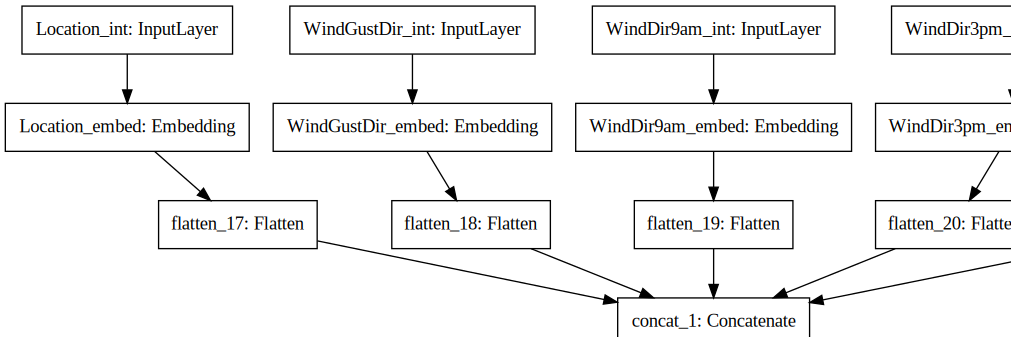

In [88]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model).create(prog='dot', format='svg'))

'flatten_6/Reshape:0'

In [99]:
%%time
from keras import callbacks
from sklearn import metrics as mt
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(X_ints_train + [X_train_num], # create a list of inputs for embeddings
        encoded_y_train, epochs=10, batch_size=32, verbose=1, validation_data = (X_ints_test + [X_test_num], encoded_y_test),
                   callbacks = [keras.callbacks.TensorBoard(
    log_dir = 'my_log_dir',
    histogram_freq = 1,
    embeddings_freq = 1,
    embeddings_data = encoded_train,
)])

#yhat = np.round(model.predict(X_ints_test + [X_test_num]))
#print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

//anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v2.py:102: UserWarning: The TensorBoard callback does not support embeddings display when using TensorFlow 2.0. Embeddings-related arguments are ignored.
  warnings.warn('The TensorBoard callback does not support '
//anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 90340 samples, validate on 22585 samples
Epoch 1/10
90340/90340 [==============================] - 15s 166us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764
Epoch 2/10
90340/90340 [==============================] - 13s 145us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764
Epoch 3/10
90340/90340 [==============================] - 13s 146us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764
Epoch 4/10
90340/90340 [==============================] - 14s 154us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764
Epoch 5/10
90340/90340 [==============================] - 13s 147us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764
Epoch 6/10
90340/90340 [==============================] - 13s 148us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764
Epoch 7/10
90340/90340 [==============================] 

In [160]:
weights_history = []
from keras import callbacks
# A custom callback THIS IS IMPORTANT
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback
checkpoint = callbacks.ModelCheckpoint("model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)
class MyCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs):
        weights = model.get_weights()[0]
        weights_history.append(weights)


callback = MyCallback()

In [161]:
%%time

from sklearn import metrics as mt
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
#For Riley, LOok at the callbacks here. This is important for looking at the saved weights!
history = model.fit(X_ints_train + [X_train_num], # create a list of inputs for embeddings
        encoded_y_train, epochs=10, batch_size=32, verbose=1, validation_data = (X_ints_test + [X_test_num], encoded_y_test),
                   callbacks = [checkpoint])


//anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 90340 samples, validate on 22585 samples
Epoch 1/10
90340/90340 [==============================] - 16s 178us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764

Epoch 00001: loss improved from inf to 0.22104, saving model to model.hdf5
Epoch 2/10
90340/90340 [==============================] - 13s 145us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764

Epoch 00002: loss did not improve from 0.22104
Epoch 3/10
90340/90340 [==============================] - 13s 146us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764

Epoch 00003: loss did not improve from 0.22104
Epoch 4/10
90340/90340 [==============================] - 15s 164us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_accuracy: 0.7764

Epoch 00004: loss did not improve from 0.22104
Epoch 5/10
90340/90340 [==============================] - 12s 136us/step - loss: 0.2210 - accuracy: 0.7790 - val_loss: 0.2236 - val_ac

<Figure size 432x216 with 0 Axes>

array([[-38.716953  , -64.33857   ],
       [ 55.954582  ,  64.19211   ],
       [-28.602253  , -44.875713  ],
       [-32.001724  , -20.691973  ],
       [-12.672726  ,  17.541327  ],
       [ 13.949982  ,  33.847775  ],
       [ 39.567543  , -10.560054  ],
       [ 12.163807  , -69.1092    ],
       [-65.22922   ,  10.008113  ],
       [ 60.14596   ,  25.631351  ],
       [-48.3999    ,  67.33592   ],
       [  0.61446804, -43.097984  ],
       [-43.821144  ,  15.057139  ],
       [ 27.29297   ,  85.605804  ],
       [-15.233698  , -66.9888    ],
       [ 11.499035  ,  11.041559  ],
       [ 45.428215  , -60.502438  ],
       [-49.541653  ,  -8.816891  ],
       [-26.89656   ,   1.1778904 ],
       [-52.997593  , -83.35555   ],
       [ 56.80447   , -36.911716  ],
       [ 83.263794  ,  42.213833  ],
       [ -6.959012  , -16.707296  ],
       [-73.232185  , -16.888708  ],
       [-36.82241   ,  40.589596  ],
       [ 14.421438  , -19.597109  ],
       [-90.19348   ,   3.0921314 ],
 

In [189]:
import h5py
which_weights = ['Location_embed','WindGustDir_embed', 'WindDir9am_embed', 'WindDir3pm_embed', 'numeric_1', 'numeric_2']
weights_2d = []
from keras.models import load_model
file_to_open = "model.hdf5"
f = h5py.File(file_to_open, 'r')
model = load_model(file_to_open)
for layer in model.layers:

    g=layer.get_config()
    h=layer.get_weights()
    if g['name'] in which_weights:
        weights_2d.append(TSNE(n_components=2).fit_transform(np.array(h[0])))
        print(h[0])

//anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[[ 0.03173279  0.02336624 -0.02040418  0.00514908 -0.0072064  -0.02324144]
 [ 0.02467496 -0.04188598 -0.0084183  -0.04474099  0.00090953  0.0454861 ]
 [ 0.02271605  0.01162545 -0.02943163 -0.02819544 -0.00012649 -0.01474099]
 [-0.02765962  0.03121339  0.01185109 -0.03472351 -0.01659368 -0.0095848 ]
 [-0.02643414 -0.02367642 -0.01579195 -0.02175394  0.00806735 -0.03574079]
 [-0.02472315 -0.03990348 -0.01332886 -0.03851258  0.00527917  0.02606404]
 [-0.04156733 -0.03123038  0.03614939  0.03892103  0.0225592  -0.00436055]
 [-0.00530764  0.02924038 -0.03005568  0.03564245  0.04780987  0.0016134 ]
 [-0.03542471 -0.00743876 -0.006867   -0.04929331  0.00523461  0.00132992]
 [ 0.03378905 -0.04033102  0.00781157  0.0191123   0.03743238  0.02948871]
 [-0.0313352  -0.04514027 -0.01904486  0.03316903 -0.03045219 -0.02084302]
 [-0.01574796  0.03477657  0.00696764  0.01195295  0.02874367 -0.01711839]
 [-0.03225745  0.01113652  0.01398939 -0.04289296  0.00152404  0.00201631]
 [ 0.0384555  -0.04223773

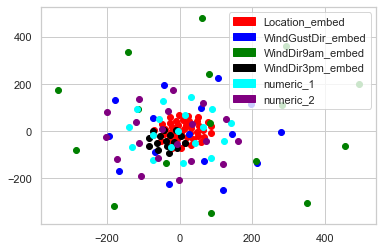

In [204]:
colors = ["red", "blue", "green", "black", "cyan", "purple"]

import matplotlib.patches as mpatches
patches= []
for i in range(len(weights_2d)):
    patches.append (mpatches.Patch(color=colors[i], label=which_weights[i]))
    plt.scatter(weights_2d[i][:,0], weights_2d[i][:,1], color=colors[i], label=which_weights[i])
plt.legend(handles=patches)
plt.show()

Looking at all of the weights, we can see that there is only one cluster for certain embeded classes. The one that interests me the most is the WindDir3pm embeding. It looks like there is some clustering going on here since all of the weights are pretty clustered into the same location. This means that this item is very important regarding our classification.

Sadly, it does not look like there is too much clustering for any of the other columns. All of the other columns are spread out across their domain. I am surprised to see that WinDir9Am is much more spread out than the WindDir3pm column. I assume this means that the wind at 9am does not mean much for rain the following day rather than wind at 3pm.

Epoch 1/10
99734/99734 [==============================] - 6s 61us/step - loss: 0.1805 - accuracy: 0.7588
Epoch 2/10
99734/99734 [==============================] - 6s 56us/step - loss: 0.1731 - accuracy: 0.7773
Epoch 3/10
99734/99734 [==============================] - 7s 73us/step - loss: 0.1731 - accuracy: 0.7773
Epoch 4/10
99734/99734 [==============================] - 6s 63us/step - loss: 0.1731 - accuracy: 0.7773
Epoch 5/10
99734/99734 [==============================] - 7s 69us/step - loss: 0.1731 - accuracy: 0.7773
Epoch 6/10
99734/99734 [==============================] - 5s 54us/step - loss: 0.1731 - accuracy: 0.7773
Epoch 7/10
99734/99734 [==============================] - 5s 53us/step - loss: 0.1731 - accuracy: 0.7773
Epoch 8/10
99734/99734 [==============================] - 6s 61us/step - loss: 0.1731 - accuracy: 0.7773
Epoch 9/10
99734/99734 [==============================] - 7s 67us/step - loss: 0.1731 - accuracy: 0.7773
Epoch 10/10
99734/99734 [==============================